In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import os
import math
from scipy import signal
import scipy
from scipy.fft import fft, fftfreq


In [2]:
def findIndexBefore(list1, num):
    for i in range(len(list1)):
        if (list1[i]) > num:
            return i - 1
    return len(list1) - 1

In [36]:
day = "2024-07-02"
dir = "/Users/henrywang/Documents/PPGBloodGlucosePrediction/CaffeineReadings/6-26Readings/" + day

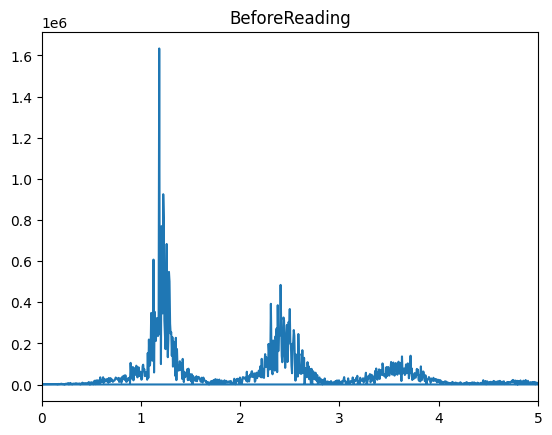

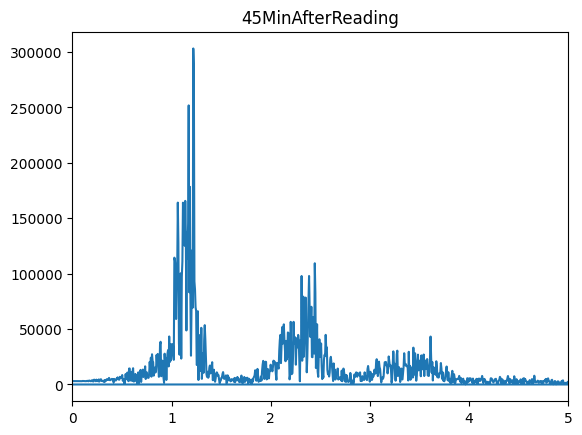

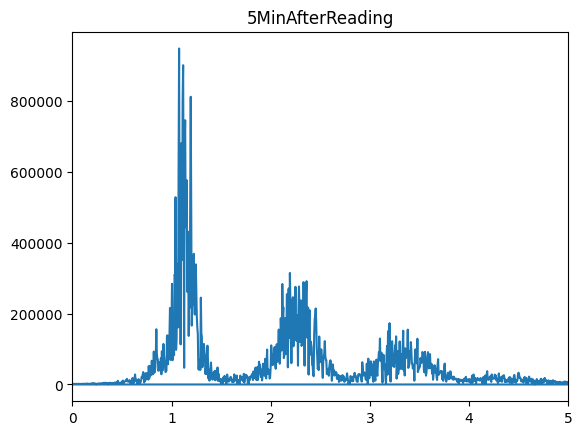

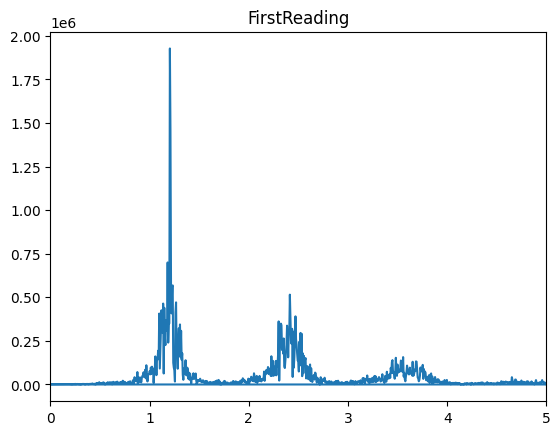

In [37]:
count = 1
for file in os.listdir(dir):
    name = file[:-4]
    time, y1, y2 = np.loadtxt(dir + "/" + file, delimiter = ",", unpack=True)
    y1 = -y1
    y2 = -y2
    y2 = y2[1000:]

    sos = signal.butter(2, [0.7, 4], fs=100, btype='band', output='sos')
    y2 = (signal.sosfiltfilt(sos, y2))
    y2 = np.array(y2)
    yf = fft(y2)
    xf = fftfreq(len(y2), 1 / 100)

    plt.xlim(0, 5)
    plt.title(name)
    plt.plot(xf, np.abs(yf))
    count+= 1
    plt.show()



Text(0.5, 1.0, 'Right Before Consuming Caffeine')

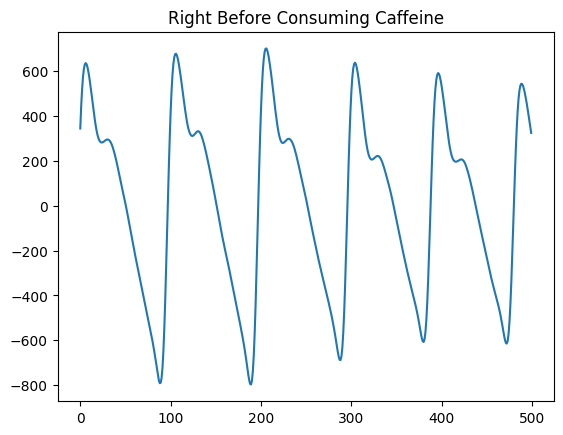

In [14]:
time, y1, y2 = np.loadtxt('/Users/henrywang/Documents/PPGBloodGlucosePrediction/CaffeineReadings/6-26Readings/2024-07-05/BeforeReading.txt', delimiter = ",", unpack=True)
y1 = -y1
y2 = -y2
sos = signal.butter(2, [0.5, 8], fs=100, btype='band', output='sos')
y2 = (signal.sosfiltfilt(sos, y2))
y2 = y2[500:1000]

time = time[500:1000]
plt.plot(y2)
plt.title("Right Before Consuming Caffeine")

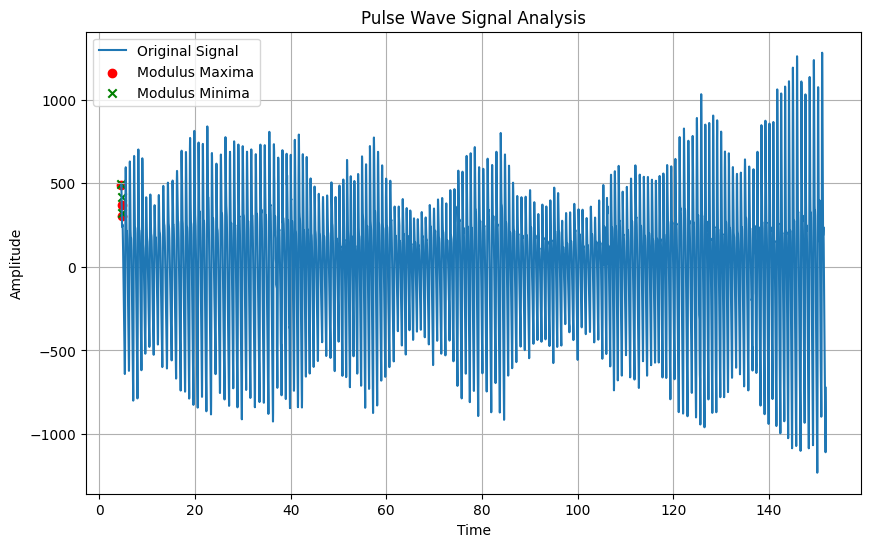

In [89]:
import numpy as np
import pywt  # PyWavelets for wavelet transform
import matplotlib.pyplot as plt  # For plotting (optional)
from scipy.signal import argrelextrema  # For finding local extrema

# Apply discrete wavelet transform (DWT)
wavelet = 'db4'  # Choose a wavelet function (Daubechies 4 in this case)
coeffs = pywt.wavedec(y2, wavelet)
# Extracting modulus maxima and minima
max_indices = argrelextrema(np.abs(coeffs[1]), np.greater)[0]
min_indices = argrelextrema(np.abs(coeffs[1]), np.less)[0]

t = time
plt.figure(figsize=(10, 6))
plt.plot(t, y2, label='Original Signal')
plt.scatter(t[max_indices], y2[max_indices], c='r', marker='o', label='Modulus Maxima')
plt.scatter(t[min_indices], y2[min_indices], c='g', marker='x', label='Modulus Minima')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Pulse Wave Signal Analysis')
plt.grid(True)
plt.show()




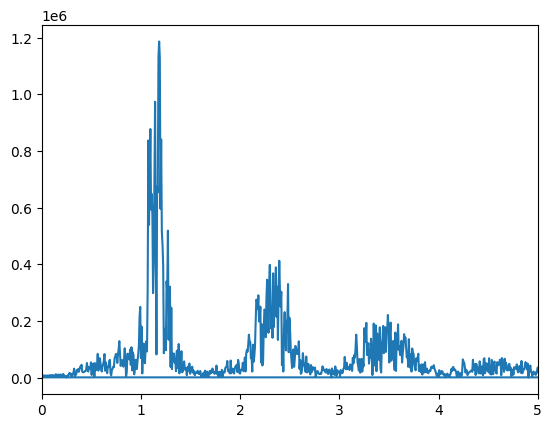

In [71]:
yf = fft(y2)
xf = fftfreq(len(y2), 1 / 100)

plt.xlim(0, 5)
plt.plot(xf, np.abs(yf))

In [61]:
timeAfter, y1After, y2After = np.loadtxt('/Users/henrywang/Documents/PPGBloodGlucosePrediction/CaffeineReadings/6-26Readings/2024-07-02/FirstReading.txt', delimiter = ",", unpack=True)
y1After = -y1After
y2After = -y2After
sos = signal.butter(2, [0.7, 4], fs=100, btype='band', output='sos')
y2After = (signal.sosfiltfilt(sos, y2After))
y2After = y2After[300:15000]
